In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor

# Load Dataset
file_path = "train.csv"  # Update the path if needed
df = pd.read_csv(file_path)


print("Data loaded successfully!")
print(f"Data shape: {df.shape}")
print(df.head())
print(df.info())
# print(df.describe())

Data loaded successfully!
Data shape: (1200000, 21)
   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle

Gender
Male      50.21425
Female    49.78575
Name: proportion, dtype: float64


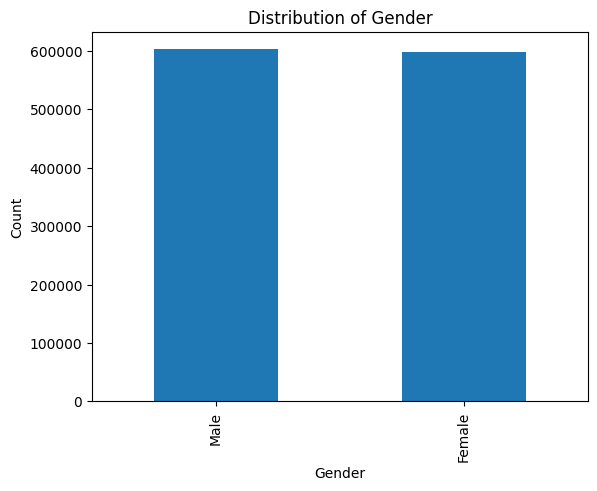

Marital Status
Single      33.465993
Married     33.375005
Divorced    33.159003
Name: proportion, dtype: float64


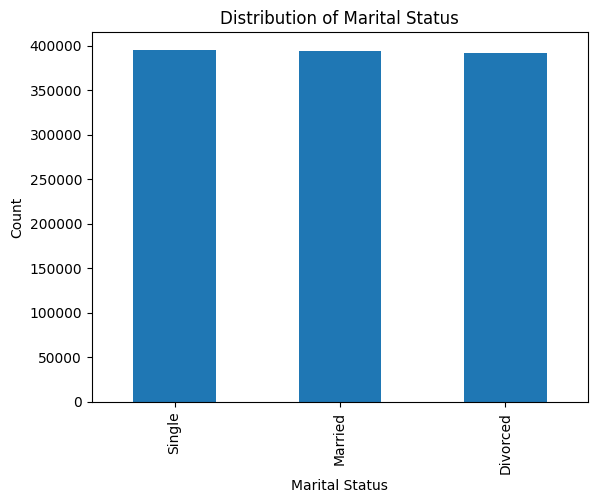

Education Level
Master's       25.318167
PhD            25.292250
Bachelor's     25.269500
High School    24.120083
Name: proportion, dtype: float64


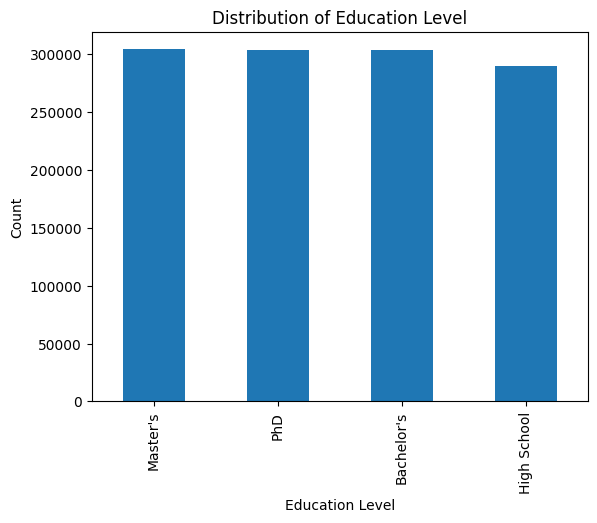

Occupation
Employed         33.583752
Self-Employed    33.571280
Unemployed       32.844968
Name: proportion, dtype: float64


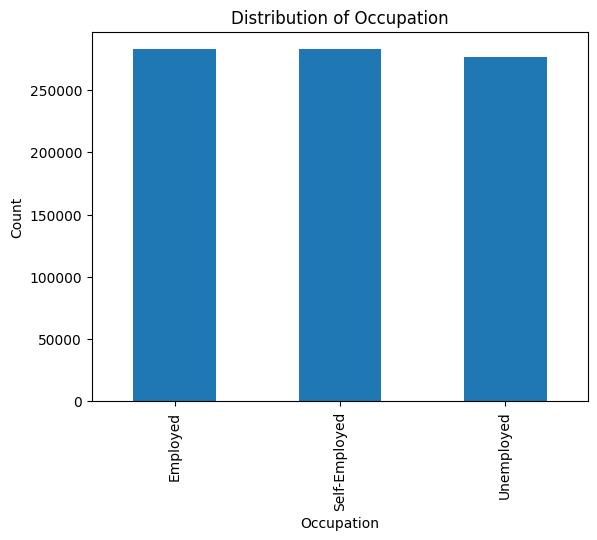

Location
Suburban    33.461833
Rural       33.412250
Urban       33.125917
Name: proportion, dtype: float64


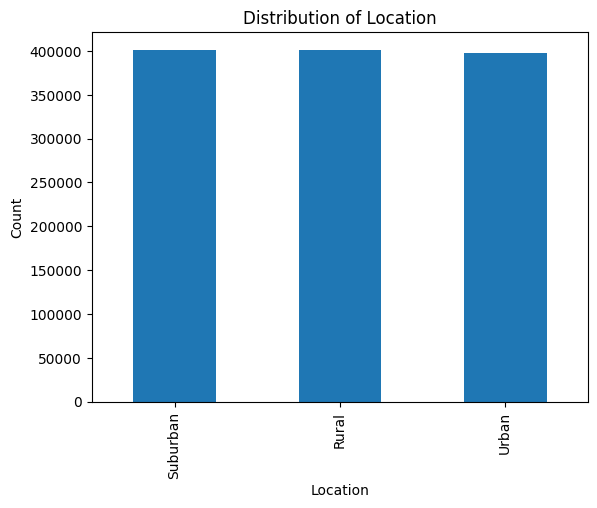

Policy Type
Premium          33.487167
Comprehensive    33.300000
Basic            33.212833
Name: proportion, dtype: float64


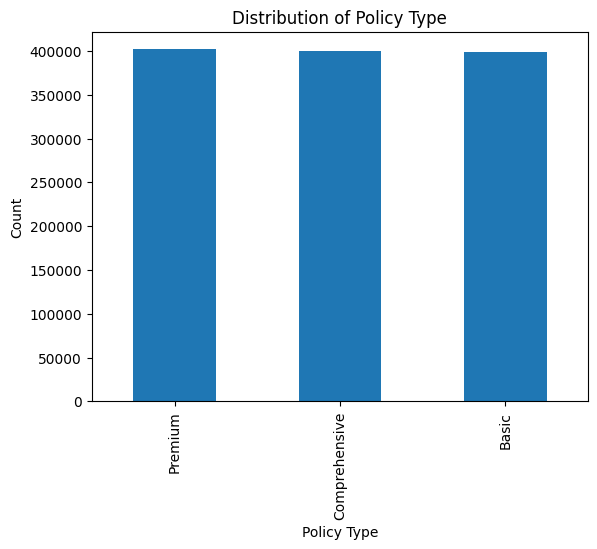

Customer Feedback
Average    33.676090
Poor       33.463378
Good       32.860532
Name: proportion, dtype: float64


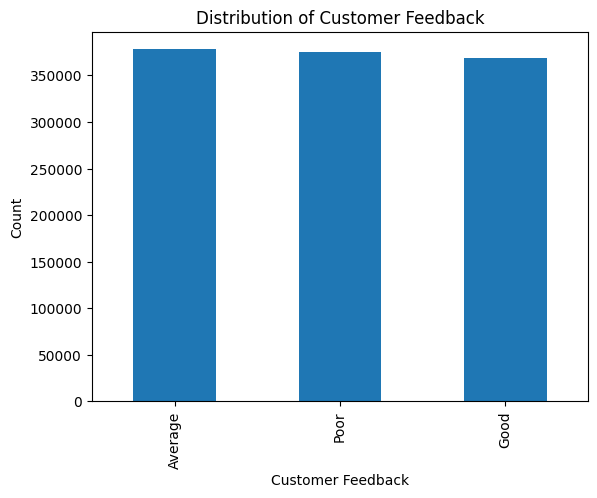

Smoking Status
Yes    50.156083
No     49.843917
Name: proportion, dtype: float64


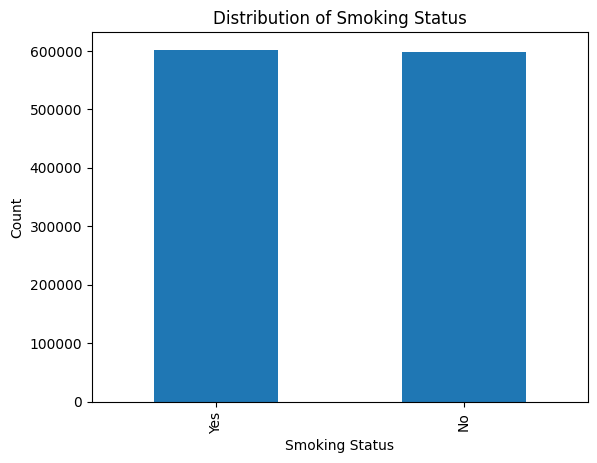

Exercise Frequency
Weekly     25.514917
Monthly    24.985833
Rarely     24.951667
Daily      24.547583
Name: proportion, dtype: float64


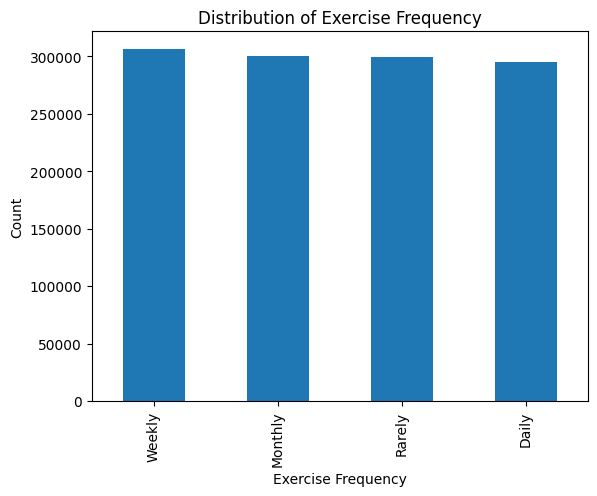

Property Type
House        33.362417
Apartment    33.331500
Condo        33.306083
Name: proportion, dtype: float64


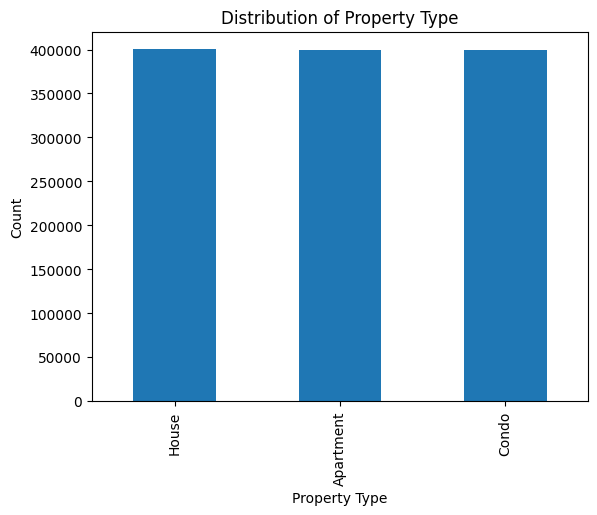

In [3]:
# Identify Categorical Features
cat_features = df.select_dtypes(include=["object"]).columns.tolist()

# Remove 'Policy Start Date' if it exists (safe removal)
if "Policy Start Date" in cat_features:
    cat_features.remove("Policy Start Date")

# Plot distribution for each categorical feature
for col in cat_features:
    print(df[col].value_counts(normalize=True) * 100)
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


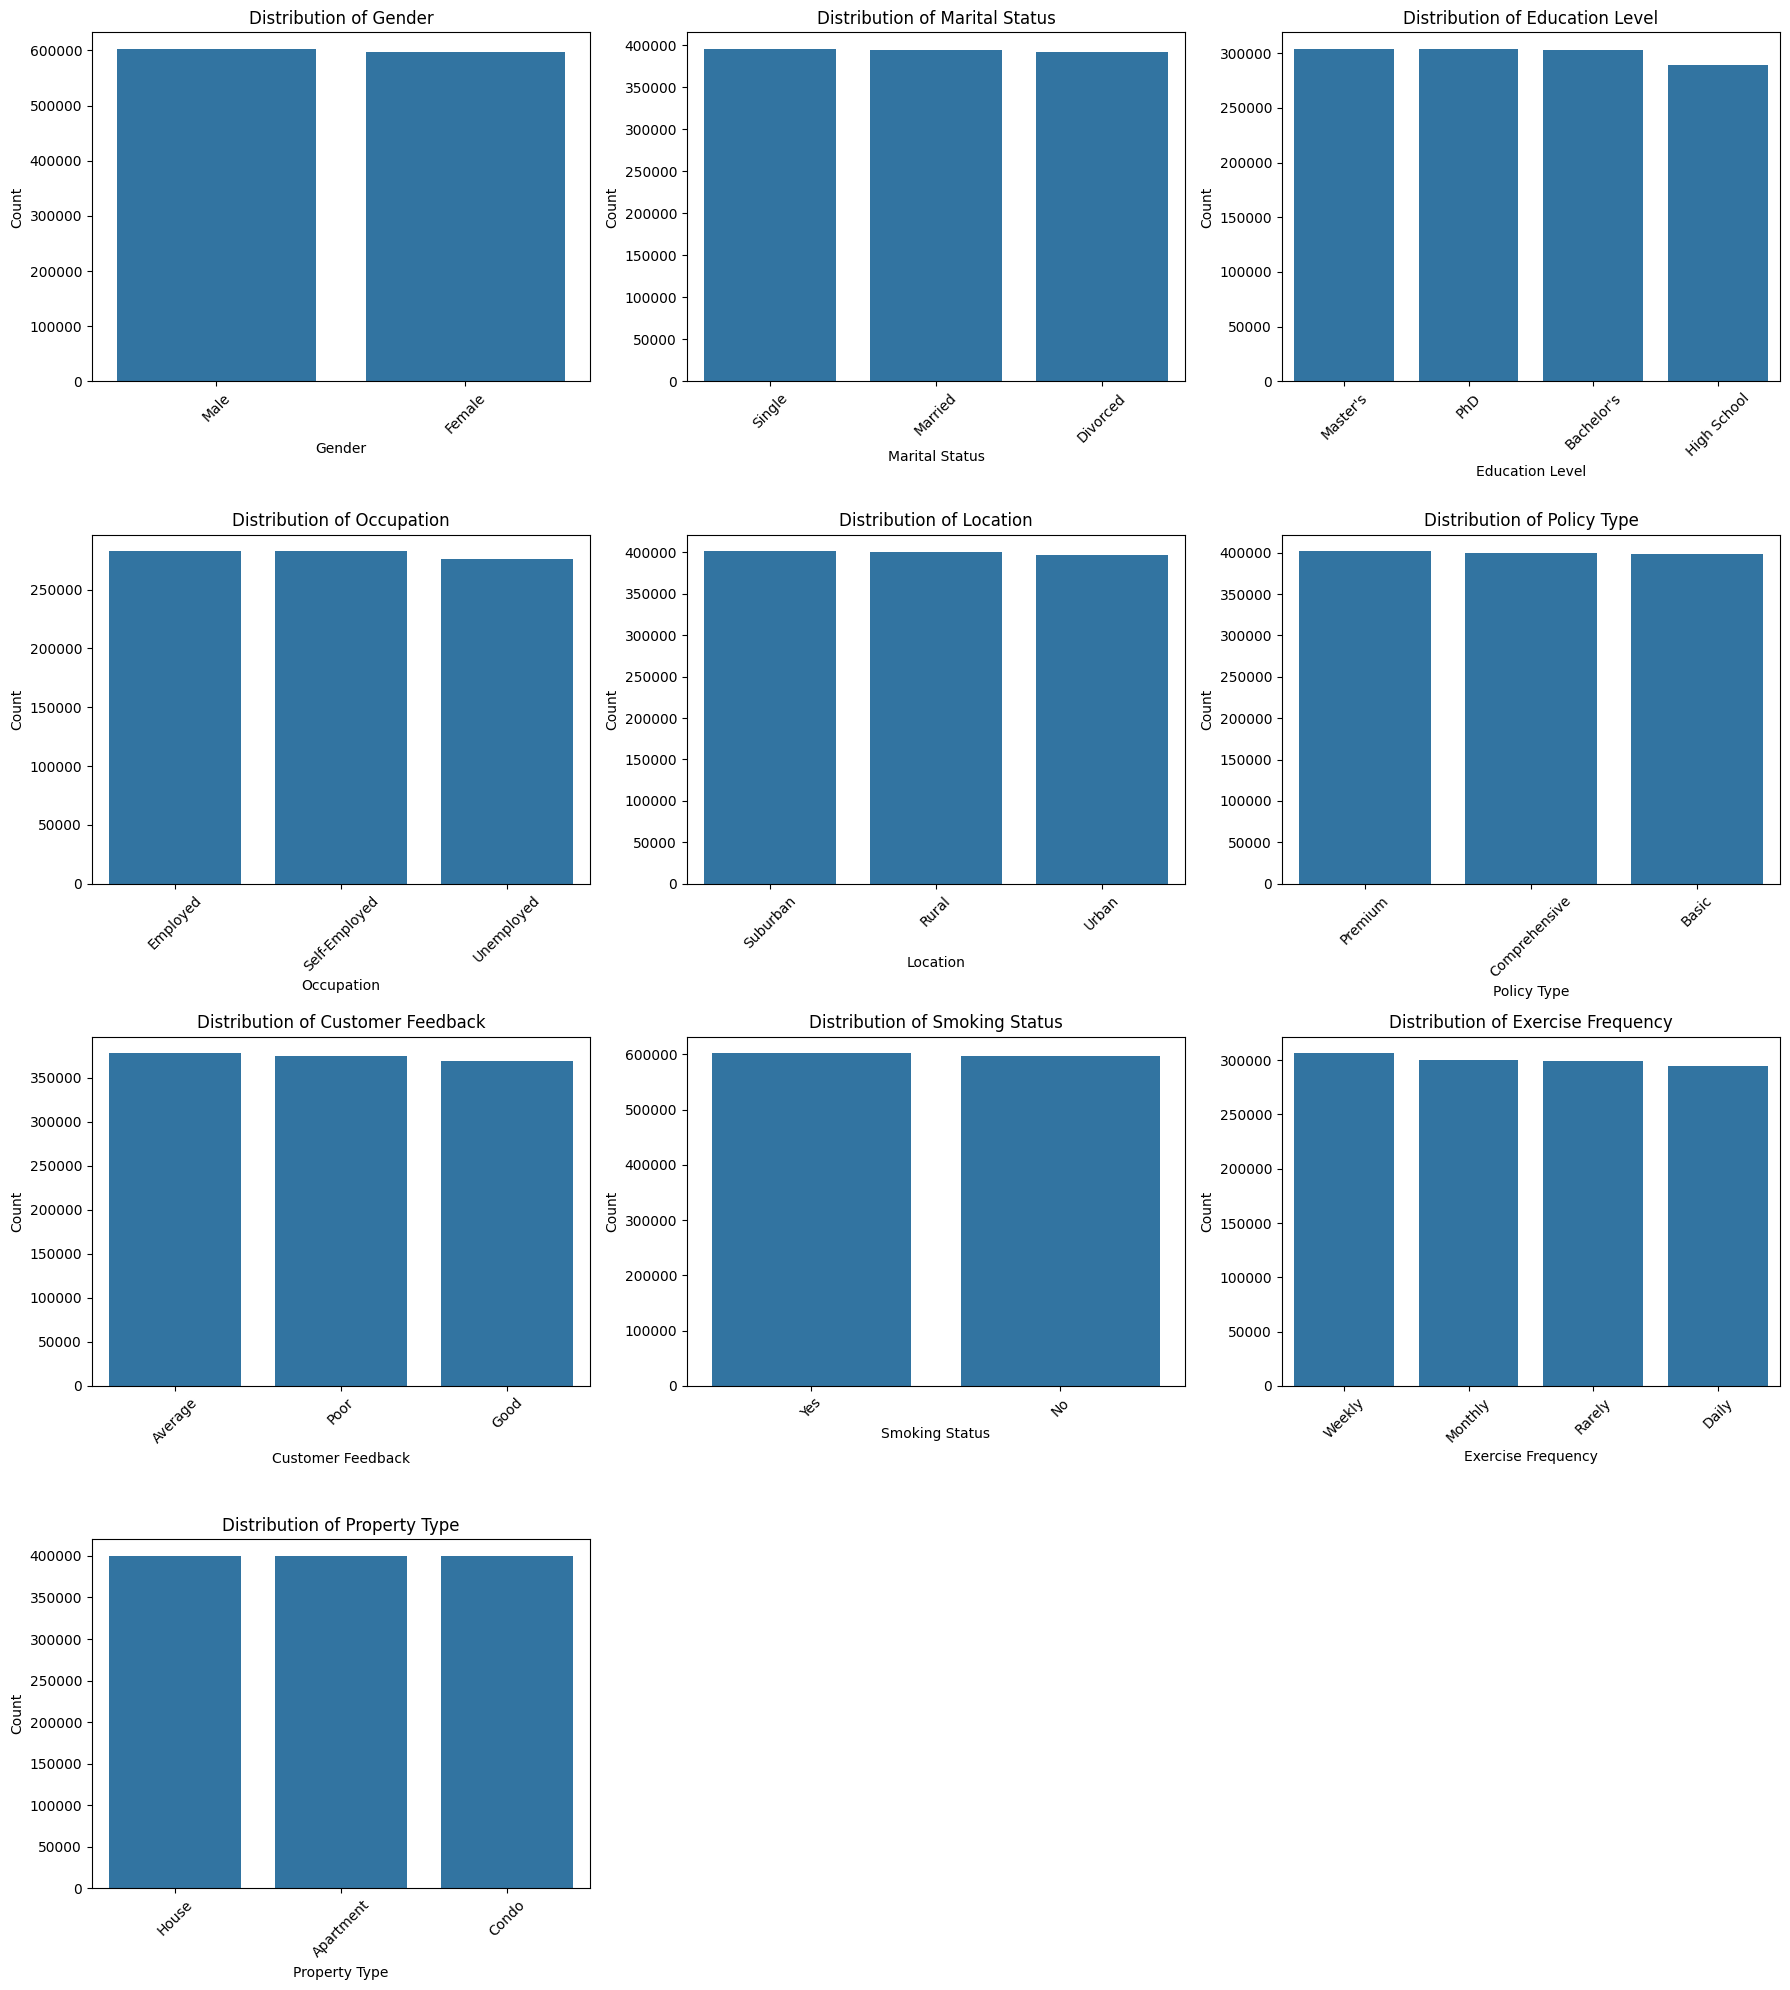

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Identify Categorical Features
cat_features = df.select_dtypes(include=["object"]).columns.tolist()

# Remove 'Policy Start Date' if it exists (safe removal)
if "Policy Start Date" in cat_features:
    cat_features.remove("Policy Start Date")

# Calculate number of rows and columns for the subplots
n_cols = 3  # Number of columns
n_rows = math.ceil(len(cat_features) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()  # Flatten in case of a single row

# Plot each categorical feature
for idx, col in enumerate(cat_features):
    ax = axes[idx]
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

# Hide any empty subplots
for i in range(len(cat_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


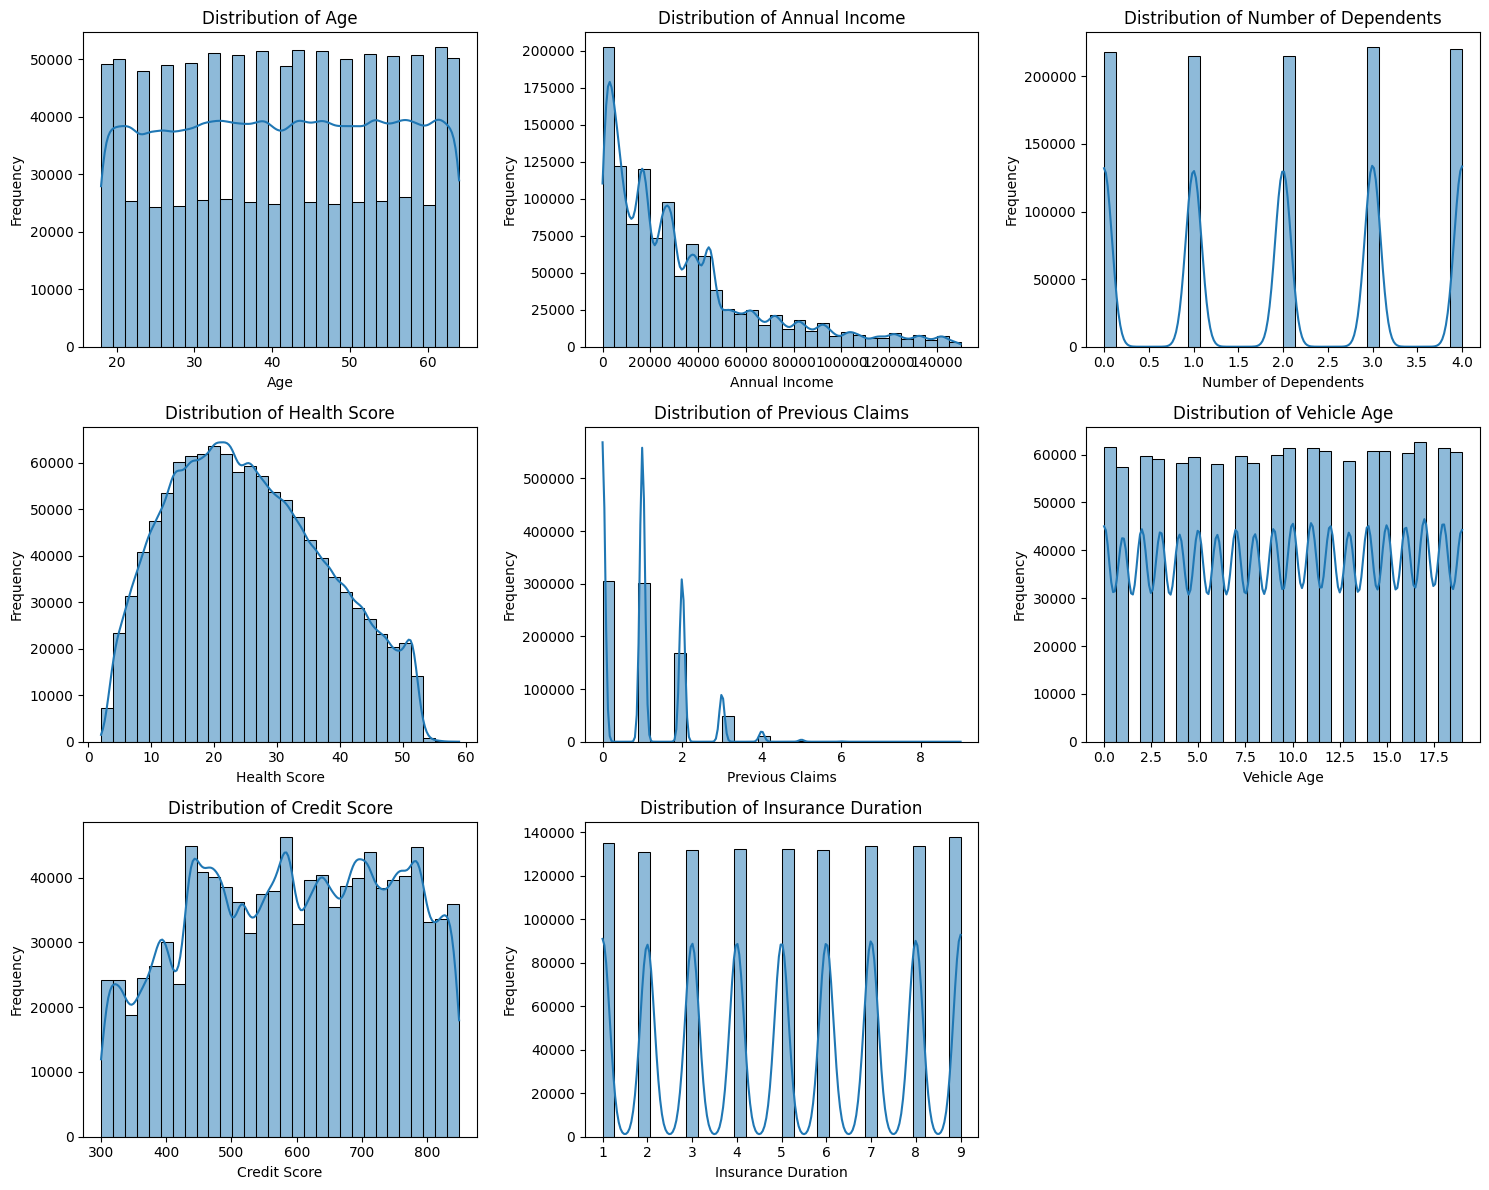

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select Numerical Features
num_features = df.select_dtypes(include=["float64"]).columns.tolist()

# Remove the target if it's in the list
if "Premium Amount" in num_features:
    num_features.remove("Premium Amount")

# Plot all numerical features together
n_cols = 3  # number of columns of plots
n_rows = (len(num_features) + n_cols - 1) // n_cols  # calculate needed rows

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


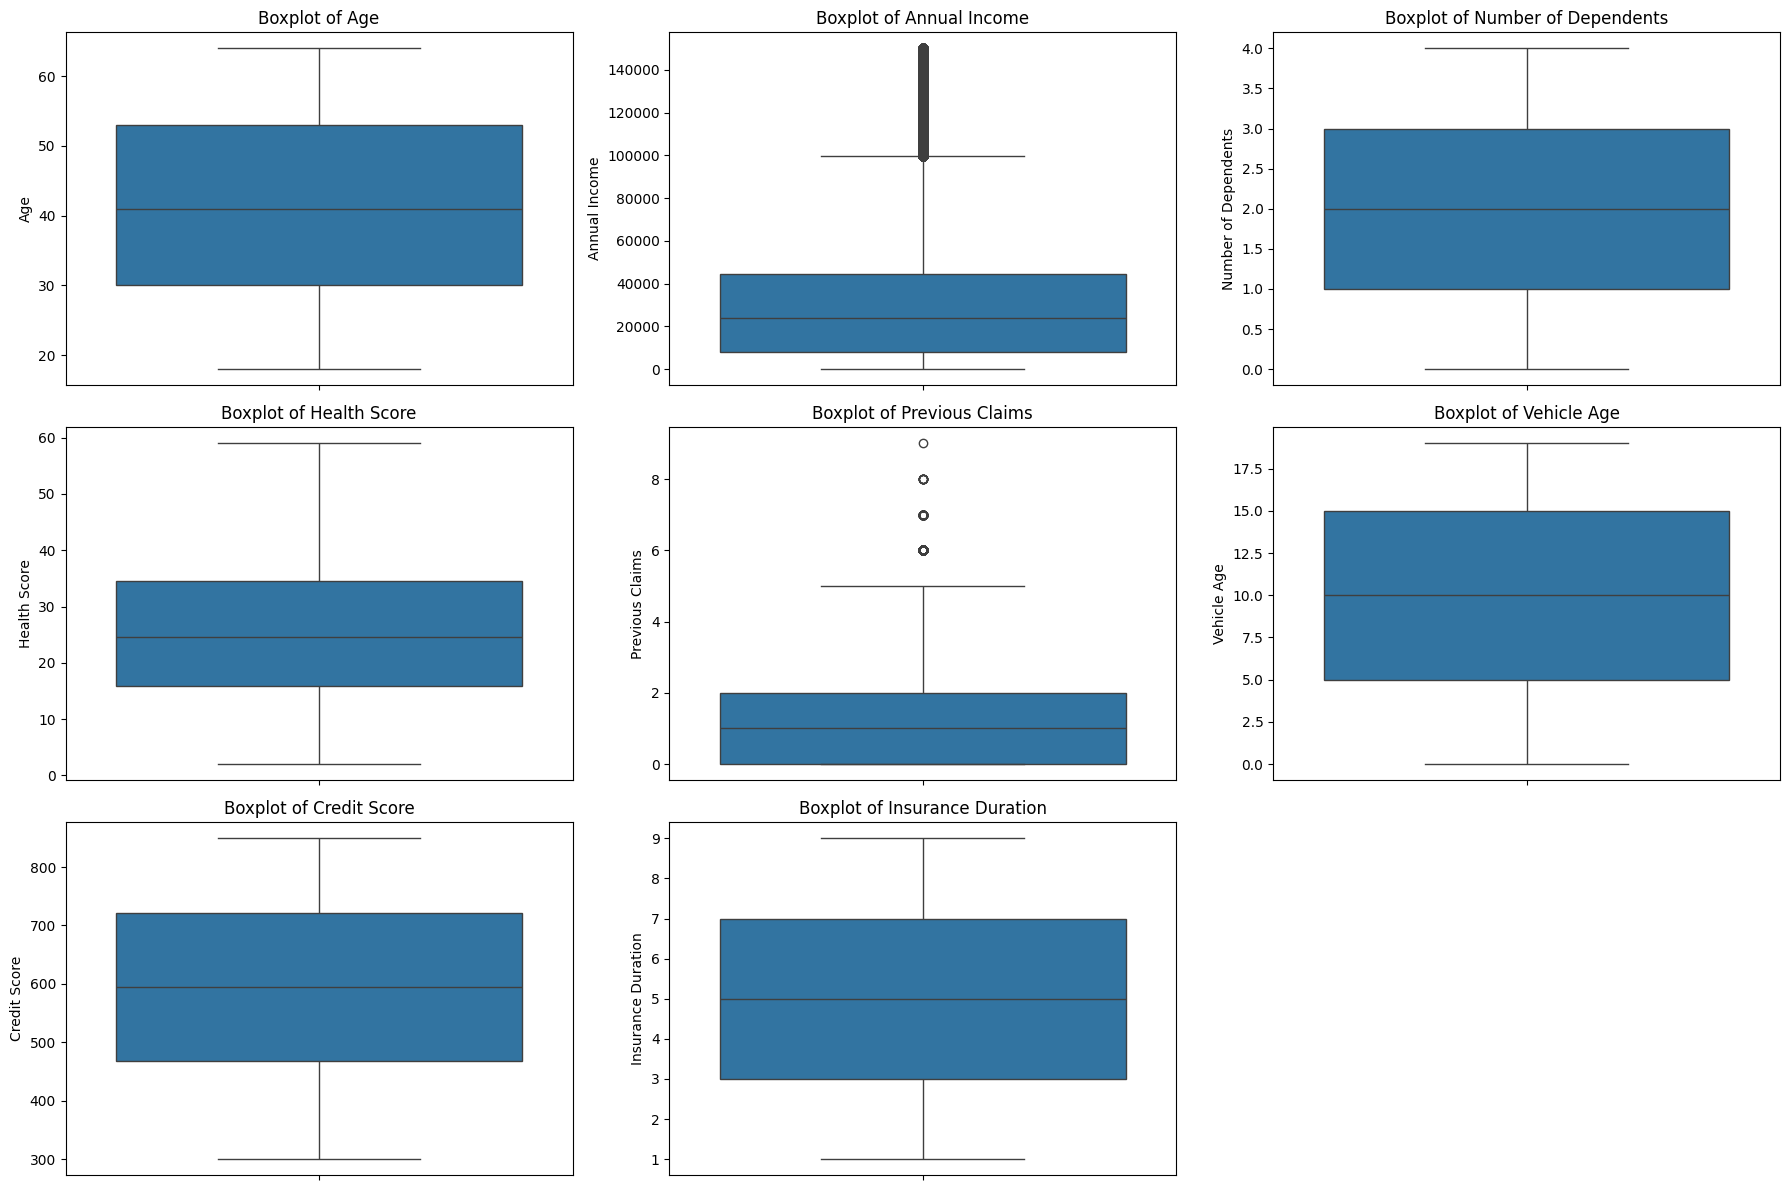

In [13]:
# Set up the plot grid
n_cols = 3  # Number of columns you want
n_rows = math.ceil(len(num_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust figure size
axes = axes.flatten()

# Plot each numerical feature
for idx, col in enumerate(num_features):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")

# Hide any empty subplots
for i in range(len(num_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Distribution of Target Variable (Premium Amount)
plt.figure(figsize=(8, 5))
sns.histplot(df['Premium Amount'], bins=50, kde=True)
plt.title("Distribution of Premium Amount")
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()

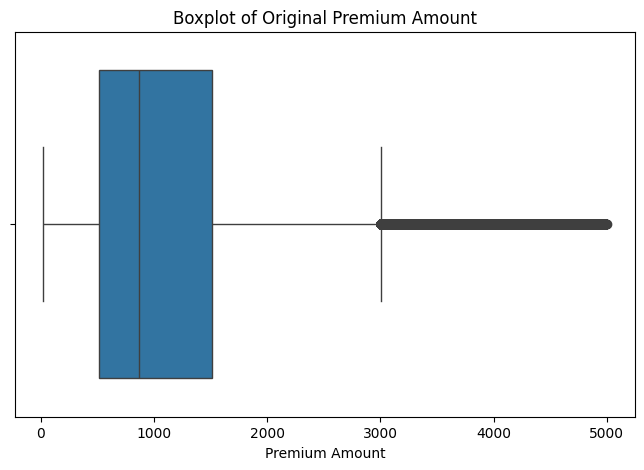

In [17]:
# Boxplot of Original Premium Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Premium Amount"])
plt.title("Boxplot of Original Premium Amount")
plt.xlabel("Premium Amount")
plt.show()

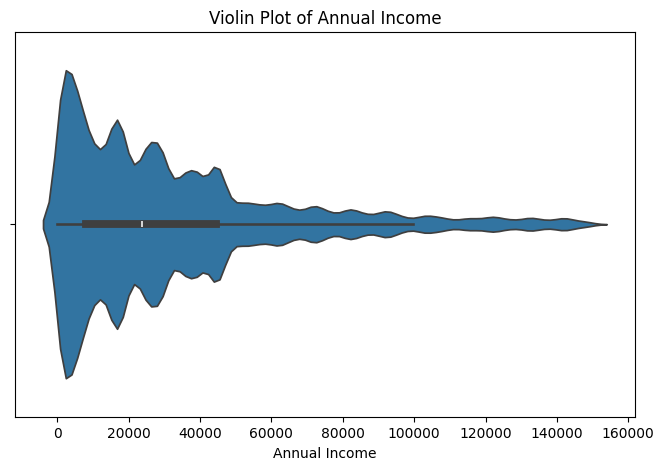

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Violin plot for Annual Income
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["Annual Income"])
plt.title("Violin Plot of Annual Income")
plt.xlabel("Annual Income")
plt.show()


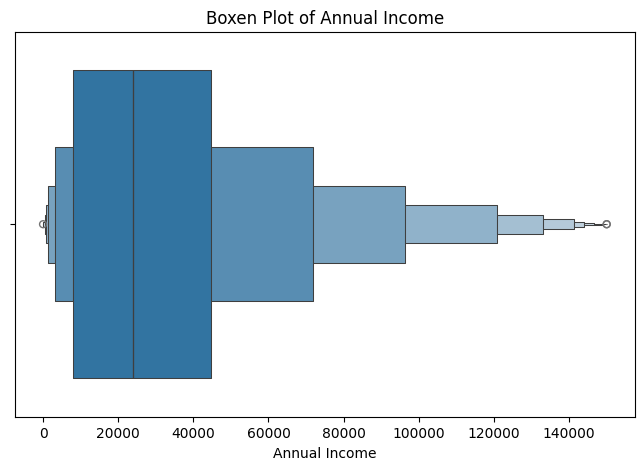

In [15]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x=df["Annual Income"])
plt.title("Boxen Plot of Annual Income")
plt.xlabel("Annual Income")
plt.show()

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set significance level
significance_level = 0.05  

# Initialize dictionary for results
anova_results = {}

print("\n📊 ANOVA Results (Categorical Features vs Target - Premium Amount):")
print("=" * 60)

# Perform ANOVA: Each Categorical Feature vs Premium Amount
for cat_col in cat_features:
    groups = [df["Premium Amount"][df[cat_col] == category] for category in df[cat_col].dropna().unique()]

    if len(groups) > 1:
        try:
            f_stat, p_value = stats.f_oneway(*groups)
            anova_results[cat_col] = p_value

            if p_value < significance_level:
                print(f"✔ {cat_col} vs Premium Amount | p-value: {p_value:.6f} (Significant ✅)")
            else:
                print(f"❌ {cat_col} vs Premium Amount | p-value: {p_value:.6f} (Not Significant)")
        except Exception as e:
            print(f"⚠️ Error testing {cat_col}: {e}")

# Convert Results to DataFrame
anova_df = pd.DataFrame(anova_results.items(), columns=["Categorical Feature", "p-value"])
anova_df = anova_df.sort_values(by="p-value")

# Visualize Significant Relationships
significant_results = anova_df[anova_df["p-value"] < significance_level]

if not significant_results.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=-np.log10(significant_results["p-value"]), 
        y=significant_results["Categorical Feature"], 
        palette="coolwarm"
    )
    plt.xlabel("-log10(p-value)")
    plt.ylabel("Categorical Features")
    plt.title("Significant ANOVA Results (vs Premium Amount)")
    plt.show()
else:
    print("\n🚀 No significant relationships found!")



📊 ANOVA Results (Categorical Features vs Target - Premium Amount):
❌ Gender vs Premium Amount | p-value: 0.860021 (Not Significant)
❌ Marital Status vs Premium Amount | p-value: 0.620333 (Not Significant)
❌ Education Level vs Premium Amount | p-value: 0.329249 (Not Significant)
❌ Occupation vs Premium Amount | p-value: 0.677483 (Not Significant)
❌ Location vs Premium Amount | p-value: 0.508437 (Not Significant)
❌ Policy Type vs Premium Amount | p-value: 0.624434 (Not Significant)
❌ Customer Feedback vs Premium Amount | p-value: 0.072483 (Not Significant)
❌ Smoking Status vs Premium Amount | p-value: 0.858504 (Not Significant)
❌ Exercise Frequency vs Premium Amount | p-value: 0.694050 (Not Significant)
❌ Property Type vs Premium Amount | p-value: 0.349525 (Not Significant)

🚀 No significant relationships found!


In [ ]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume your DataFrame is already named df
cat_features = df.select_dtypes(include=["object"]).columns.tolist()
significance_level = 0.05

# Remove 'Policy Start Date' if exists
if "Policy Start Date" in cat_features:
    cat_features.remove("Policy Start Date")

# Store results
kruskal_results = {}

print("\n📊 Kruskal-Wallis H-test Results (Categorical Features vs Target - Premium Amount):")
print("=" * 60)

for cat_col in cat_features:
    # Prepare groups
    groups = [df["Premium Amount"][df[cat_col] == category] for category in df[cat_col].dropna().unique()]
    
    # Check if there are at least 2 groups with data
    if len(groups) > 1:
        stat, p_value = kruskal(*groups)
        kruskal_results[cat_col] = p_value
        
        if p_value < significance_level:
            print(f"✔ {cat_col} vs Premium Amount | p-value: {p_value:.6f} (Significant ✅)")
        else:
            print(f"❌ {cat_col} vs Premium Amount | p-value: {p_value:.6f} (Not Significant)")

# Convert to DataFrame for easier viewing
kruskal_df = pd.DataFrame(kruskal_results.items(), columns=["Categorical Feature", "p-value"])
kruskal_df = kruskal_df.sort_values(by="p-value")

# Visualize Significant Relationships
significant_results = kruskal_df[kruskal_df["p-value"] < significance_level]

if not significant_results.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=-np.log10(significant_results["p-value"]), 
        y=significant_results["Categorical Feature"], 
        palette="mako"
    )
    plt.xlabel("-log10(p-value)")
    plt.ylabel("Categorical Features")
    plt.title("Significant Relationships (Kruskal-Wallis Test)")
    plt.show()
else:
    print("\n🚀 No significant relationships found!")


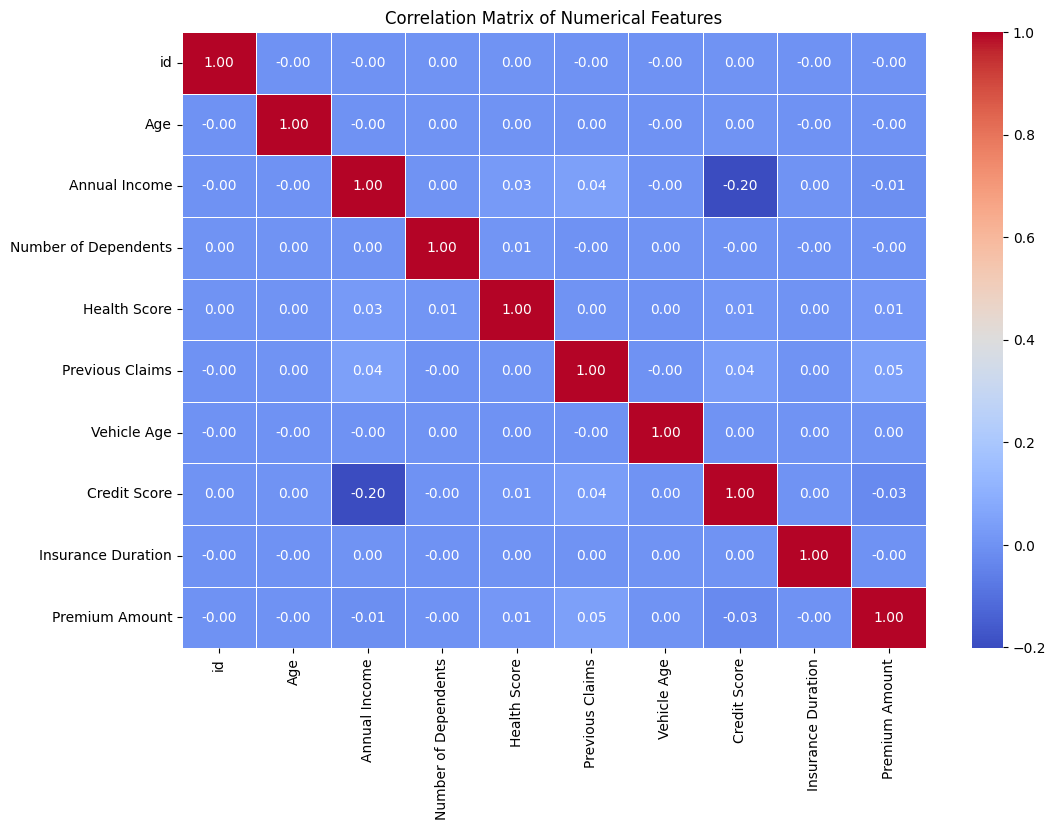

In [17]:
# Correlation Matrix for Numerical Features
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

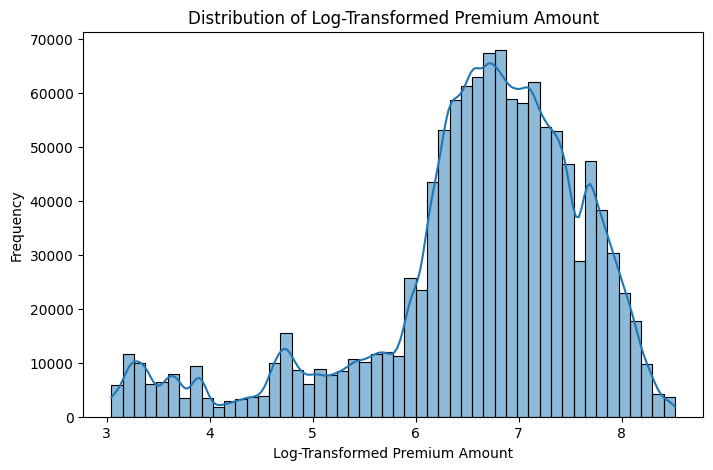

In [18]:
# 📌 Define Target Variable (Log Transformation to Reduce Skewness)
df["Premium Amount"] = np.log1p(df["Premium Amount"])  # log(1 + x) transformation

# Distribution of Transformed Target Variable (Premium Amount)
plt.figure(figsize=(8, 5))
sns.histplot(df['Premium Amount'], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Premium Amount")
plt.xlabel("Log-Transformed Premium Amount")
plt.ylabel("Frequency")
plt.show()

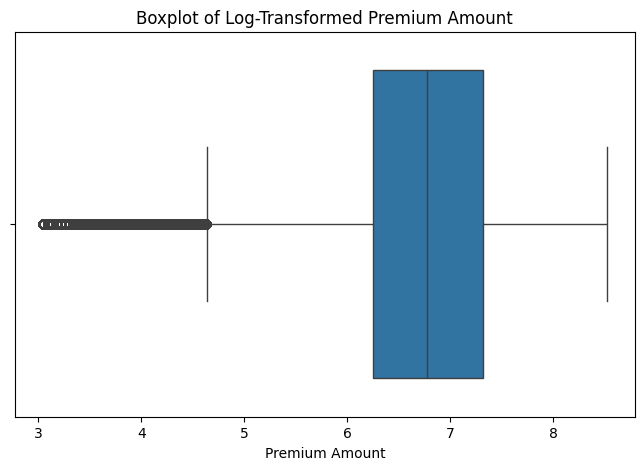

In [19]:
# Boxplot of Log-Transformed Premium Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Premium Amount"])
plt.title("Boxplot of Log-Transformed Premium Amount")
plt.xlabel("Premium Amount")
plt.show()